## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# write your code here
df = pd.read_csv('cleaned_ecommerce_dataset.csv')

In [2]:
print(f"Length of Cleaned E-commerce Dataset: {len(df)}")

Length of Cleaned E-commerce Dataset: 2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [3]:
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [23]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["gender_coding"] = ord_enc.fit_transform(df[["gender"]])
df["category_coding"] = ord_enc.fit_transform(df[["category"]])
df["review_coding"] = ord_enc.fit_transform(df[["review"]])

In [24]:
df.head(5)

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city,gender_code,category_code,review_code,gender_coding,category_coding,review_coding
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4,1.0,8.0,1618.0,1.0,8.0,1618.0
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4,1.0,8.0,1125.0,1.0,8.0,1125.0
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4,1.0,8.0,2185.0,1.0,8.0,2185.0
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4,1.0,5.0,2243.0,1.0,5.0,2243.0
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4,1.0,5.0,1033.0,1.0,5.0,1033.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userId         2685 non-null   int64  
 1   timestamp      2685 non-null   int64  
 2   review         2685 non-null   object 
 3   item           2685 non-null   object 
 4   rating         2685 non-null   float64
 5   helpfulness    2685 non-null   float64
 6   gender         2685 non-null   object 
 7   category       2685 non-null   object 
 8   item_id        2685 non-null   int64  
 9   item_price     2685 non-null   float64
 10  user_city      2685 non-null   int64  
 11  gender_code    2685 non-null   float64
 12  category_code  2685 non-null   float64
 13  review_code    2685 non-null   float64
dtypes: float64(6), int64(4), object(4)
memory usage: 293.8+ KB


In [25]:
df[['helpfulness','gender_coding','category_coding','review_coding','rating']].corr()

,helpfulness,gender_coding,category_coding,review_coding,rating
helpfulness,1.000000,0.075947,-0.013408,-0.028259,-0.007523
gender_coding,0.075947,1.000000,0.022549,-0.037884,-0.034337
category_coding,-0.013408,0.022549,1.000000,0.001970,-0.163158
review_coding,-0.028259,-0.037884,0.001970,1.000000,-0.036118
rating,-0.007523,-0.034337,-0.163158,-0.036118,1.000000


# Correlation 

From the above matrix we can observe that the Two Most Correlated features or factors of a E-commerce product rating are its Category and Review as these both are closest correlation values to -1. On the other hand, the Two Least Correlated features or factors are its Helpfulness and Gender.

In [ ]:
### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [26]:
train_10_case1, test_90_case1 = train_test_split(df, test_size=0.9, random_state=42)
print(f"Case 1:\nTraining Dataset Shape:{train_10_case1.shape}\nTesting Dataset Shape:{test_90_case1.shape}")

train_90_case2, test_10_case2 = train_test_split(df, test_size=0.1, random_state=42)
print(f"\nCase 2:\nTraining Dataset Shape:{train_90_case2.shape}\nTesting Dataset Shape:{test_10_case2.shape}")

Case 1:
Training Dataset Shape:(268, 17)
Testing Dataset Shape:(2417, 17)

Case 2:
Training Dataset Shape:(2416, 17)
Testing Dataset Shape:(269, 17)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [27]:
# MODEL - A (CASE 1 and TWO MOST CORRELATED FEATURES)
# TWO MOST CORRELATED FEATURE - CATEGORY_CODE and review_code

reg_a = linear_model.LinearRegression()
X_train_a = train_10_case1[['category_coding','review_coding']]
y_train_a = train_10_case1['rating']

X_test_a = test_90_case1[['category_coding','review_coding']]
y_test_a = test_90_case1['rating']


reg_a.fit(X_train_a, y_train_a)
print(f"Linear Model (A)\ny = x * {reg_a.coef_} + {reg_a.intercept_}")

Linear Model (A)
y = x * [-1.31822118e-01  1.21438182e-05] + 4.359413133316096


In [28]:
# MODEL - B (CASE 1 and TWO LEAST CORRELATED FEATURES)
# TWO LEAST CORRELATED FEATURE - HELPFULNESS and gender_code

reg_b = linear_model.LinearRegression()
X_train_b = train_10_case1[['helpfulness','gender_coding']]
y_train_b = train_10_case1['rating']

X_test_b = test_90_case1[['helpfulness','gender_coding']]
y_test_b = test_90_case1['rating']


reg_b.fit(X_train_b, y_train_b)
print(f"Linear Model (B)\ny = x * {reg_b.coef_} + {reg_b.intercept_}")

Linear Model (B)
y = x * [-0.14651872 -0.43196508] + 4.486090489958585


In [29]:
# MODEL - C (CASE 2 and TWO MOST CORRELATED FEATURES)
# TWO MOST CORRELATED FEATURE - CATEGORY_CODE and review_code

reg_c = linear_model.LinearRegression()
X_train_c = train_90_case2[['category_coding','review_coding']]
y_train_c = train_90_case2['rating']

X_test_c = test_10_case2[['category_coding','review_coding']]
y_test_c = test_10_case2['rating']


reg_c.fit(X_train_c, y_train_c)
print(f"Linear Model (C)\ny = x * {reg_c.coef_} + {reg_c.intercept_}")

Linear Model (C)
y = x * [-1.24834474e-01 -7.58022504e-05] + 4.422698922082497


In [13]:
# MODEL - D (CASE 2 and TWO LEAST CORRELATED FEATURES)
# TWO LEAST CORRELATED FEATURE - HELPFULNESS and gender_code

reg_d = linear_model.LinearRegression()
X_train_d = train_90_c2[['helpfulness','gender_code']]
y_train_d = train_90_c2['rating']

X_test_d = test_10_c2[['helpfulness','gender_code']]
y_test_d = test_10_c2['rating']


reg_d.fit(X_train_d, y_train_d)
print(f"Linear Model (D)\ny = x * {reg_d.coef_} + {reg_d.intercept_}")

Linear Model (D)
y = x * [-0.01270512 -0.09973812] + 3.7977272408821303


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [14]:
predicted_a = reg_a.predict(X_test_a)
mse_a = ((np.array(y_test_a)-predicted_a)**2).sum()/len(y_test_a)
root_mse_a = np.sqrt(mse_a)
print("MODEL A:\n")
print("MSE:", mse_a)
print("Root MSE:", root_mse_a)

MODEL A:

MSE: 1.776581354691434
Root MSE: 1.3328845991650717


In [15]:
predicted_b = reg_b.predict(X_test_b)
mse_b = ((np.array(y_test_b)-predicted_b)**2).sum()/len(y_test_b)
root_mse_b = np.sqrt(mse_b)
print("MODEL B:\n")
print("MSE:", mse_b)
print("Root MSE:", root_mse_b)

MODEL B:

MSE: 1.860535990321889
Root MSE: 1.3640146591301316


In [16]:
predicted_c = reg_c.predict(X_test_c)
mse_c = ((np.array(y_test_c)-predicted_c)**2).sum()/len(y_test_c)
root_mse_c = np.sqrt(mse_c)
print("MODEL C:\n")
print("MSE:", mse_c)
print("Root MSE:", root_mse_c)

MODEL C:

MSE: 1.681992500504392
Root MSE: 1.2969165356739007


In [17]:
predicted_d = reg_d.predict(X_test_d)
mse_d = ((np.array(y_test_d)-predicted_d)**2).sum()/len(y_test_d)
root_mse_d = np.sqrt(mse_d)
print("MODEL D:\n")
print("MSE:", mse_d)
print("Root MSE:", root_mse_d)

MODEL D:

MSE: 1.7245375467700426
Root MSE: 1.3132164889194937


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

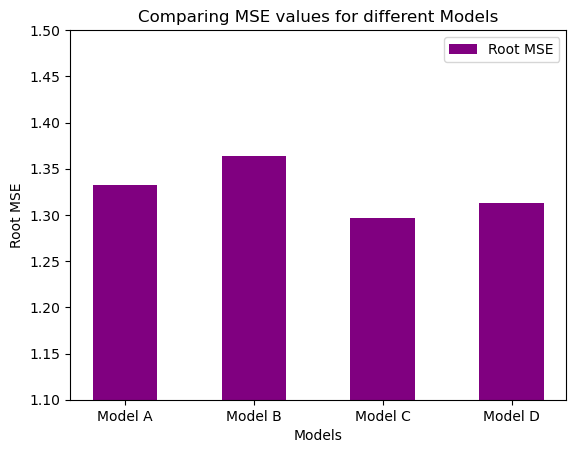

In [50]:
X = ['Model A','Model B','Model C','Model D'] 
Y = [root_mse_a,root_mse_b,root_mse_c,root_mse_d] 

X_axis = np.arange(len(X)) 

plt.bar(X_axis, Y, 0.5, label = 'Root MSE', color="purple")
plt.ylim(1.10, 1.5)

plt.xticks(X_axis, X)
plt.xlabel("Models") 
plt.ylabel("Root MSE") 
plt.title("Comparing MSE values for different Models") 
plt.legend() 
plt.show() 

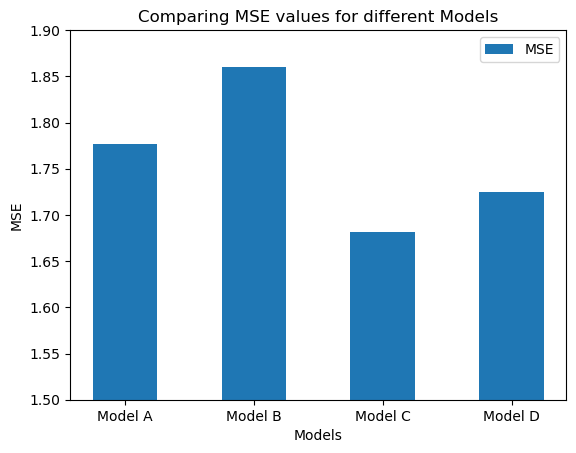

In [48]:
X = ['Model A','Model B','Model C','Model D'] 
Y = [mse_a,mse_b,mse_c,mse_d] 

X_axis = np.arange(len(X)) 

plt.bar(X_axis, Y, 0.5, label = 'MSE')
plt.ylim(1.5, 1.9)

plt.xticks(X_axis, X)
plt.xlabel("Models") 
plt.ylabel("MSE") 
plt.title("Comparing MSE values for different Models") 
plt.legend() 
plt.show() 

### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


The infographic on Olympic medal distribution raises ethical concerns primarily around clarity, bias, and data integrity. Firstly, the use of two different sorting criteria—total medals and gold medals—without explicit reasoning can mislead the audience. It suggests a subjective hierarchy of value among the medals without clarification, potentially influencing the audience's perception of each country's success. This could lead to an implicit bias, glorifying countries with more gold medals despite their total medal count.
Secondly, there is a discrepancy in the inclusion of countries; South Korea is omitted from the first table but appears in the. This selective representation can distort the overall picture of the countries' performances, possibly affecting the national prestige associated with the Olympic achievements. Such omissions can be ethically problematic as they do not present a holistic view of the data.
Finally, the infographic lacks transparency about the source and methodology behind the data presentation, which is a key ethical aspect in data science.
Finally, the ethical concerns revolve around the potential for misleading presentation, implicit bias through selective data organization, and a lack of transparency, all of which can contribute to misinformed conclusions about the data.